# GENDER DETECTION AND AGE DETECTION

Dataset:- https://www.kaggle.com/code/yeonseokcho/cnn-with-face-image-data/input

In [11]:
import numpy as np 
import pandas as pd 

import os
        
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [13]:
import tensorflow as tf
import keras

print(tf.__version__)  # To get the TensorFlow version
print(keras.__version__)  # To get the Keras version


2.13.0
2.13.1


# loading data

In [16]:
face_df = pd.read_csv("C:\\Users\\Narthana\\Downloads\\age_gender.csv")

print(face_df.shape)
face_df.head()

(23705, 5)


,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [17]:
face_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


<Axes: xlabel='age', ylabel='count'>

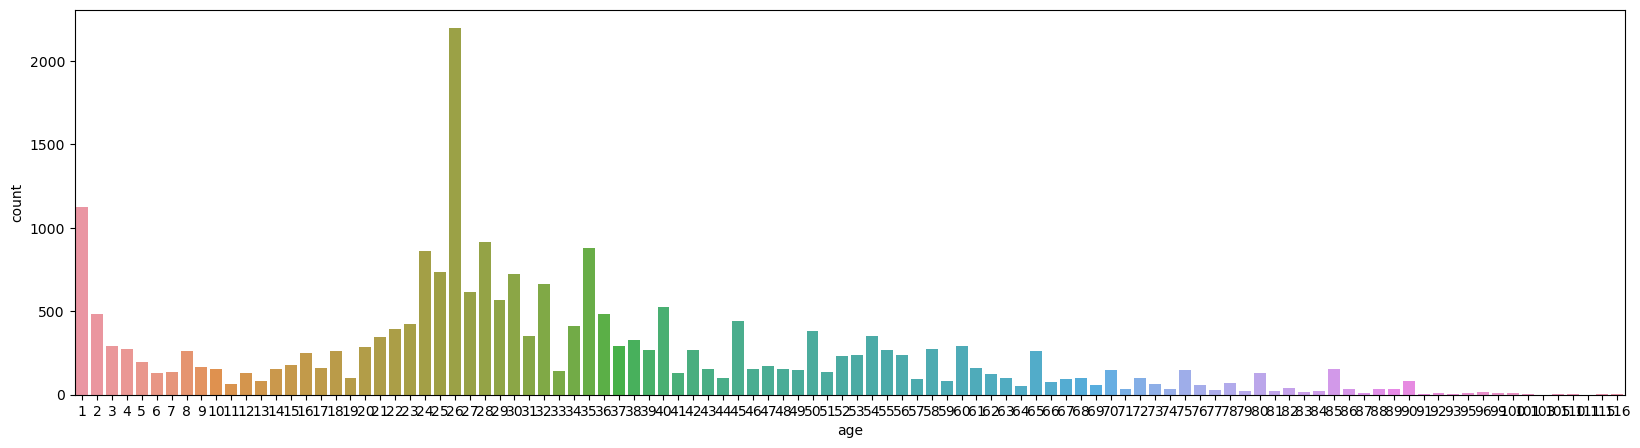

In [18]:
plt.figure(figsize = (20, 5))
sns.countplot(face_df, x = "age")

In [19]:
face_df['ethnicity'].value_counts()

0    10078
1     4526
3     3975
2     3434
4     1692
Name: ethnicity, dtype: int64

In [20]:
face_df['gender'].value_counts()

0    12391
1    11314
Name: gender, dtype: int64

# features and target

In [21]:
face_df['pixels'] = face_df['pixels'].apply(lambda x: np.array(x.split(), dtype="float32"))
face_df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [22]:
features_temp = np.array(face_df['pixels'].tolist())
features_temp[:1]

array([[129., 128., 128., ..., 146., 146., 146.]], dtype=float32)

In [23]:
# Converting pixels from 1D to 3D

features = features_temp.reshape(features_temp.shape[0],48,48,1)
features[:1]

array([[[[129.],
         [128.],
         [128.],
         ...,
         [118.],
         [ 99.],
         [ 53.]],

        [[130.],
         [129.],
         [128.],
         ...,
         [117.],
         [ 98.],
         [ 52.]],

        [[131.],
         [129.],
         [130.],
         ...,
         [114.],
         [ 97.],
         [ 50.]],

        ...,

        [[121.],
         [138.],
         [147.],
         ...,
         [151.],
         [150.],
         [148.]],

        [[117.],
         [137.],
         [146.],
         ...,
         [149.],
         [148.],
         [148.]],

        [[115.],
         [135.],
         [142.],
         ...,
         [146.],
         [146.],
         [146.]]]], dtype=float32)

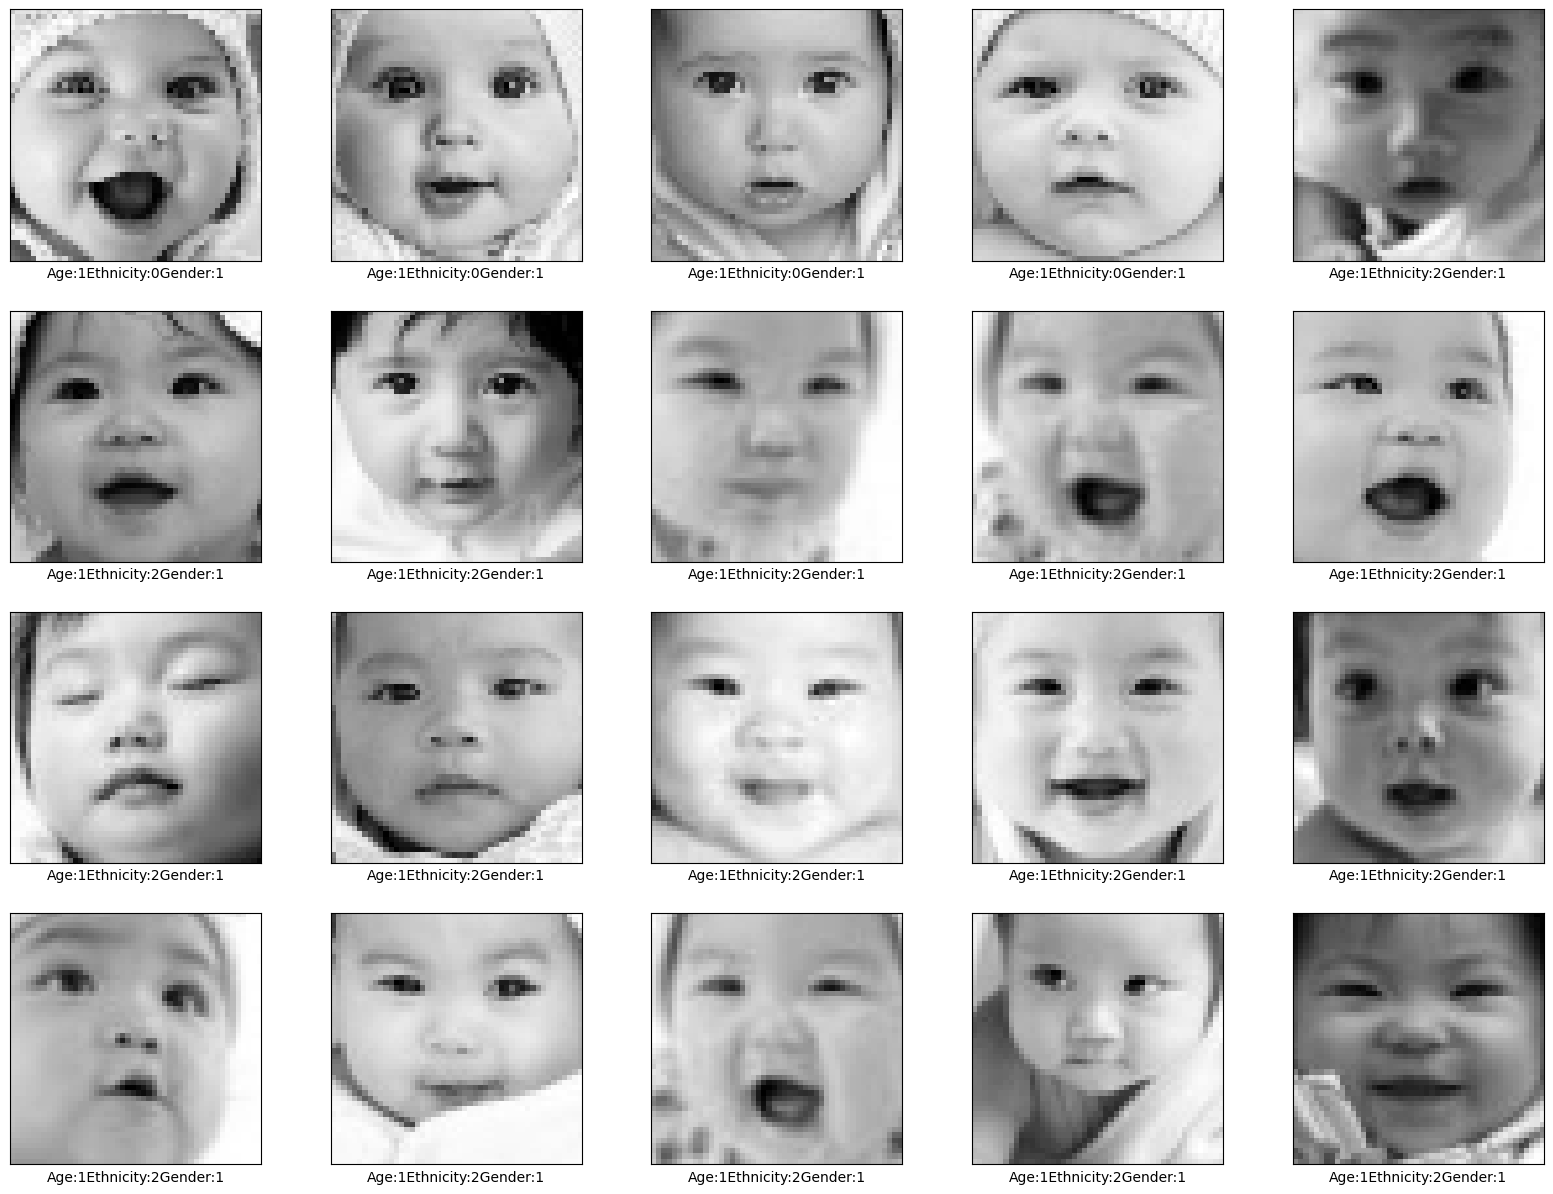

In [24]:
plt.figure(figsize=(20, 15))
for i in range(1000, 1020):
    plt.subplot(4, 5, (i%20)+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(features[i], cmap='gray')
    plt.xlabel("Age:" + str(face_df['age'].iloc[i]) + 
               "Ethnicity:" + str(face_df['ethnicity'].iloc[i]) + 
               "Gender:" + str(face_df['gender'].iloc[i]))
plt.show()

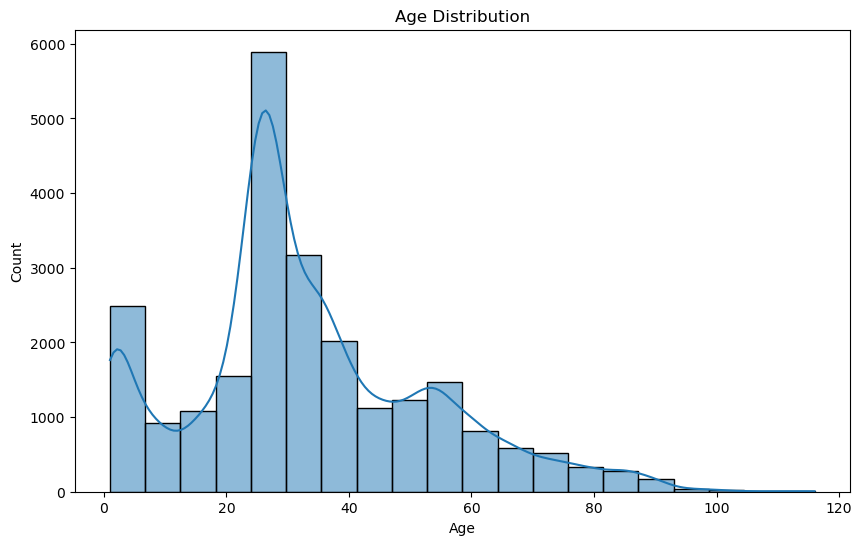

In [25]:
# Visualize the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(face_df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

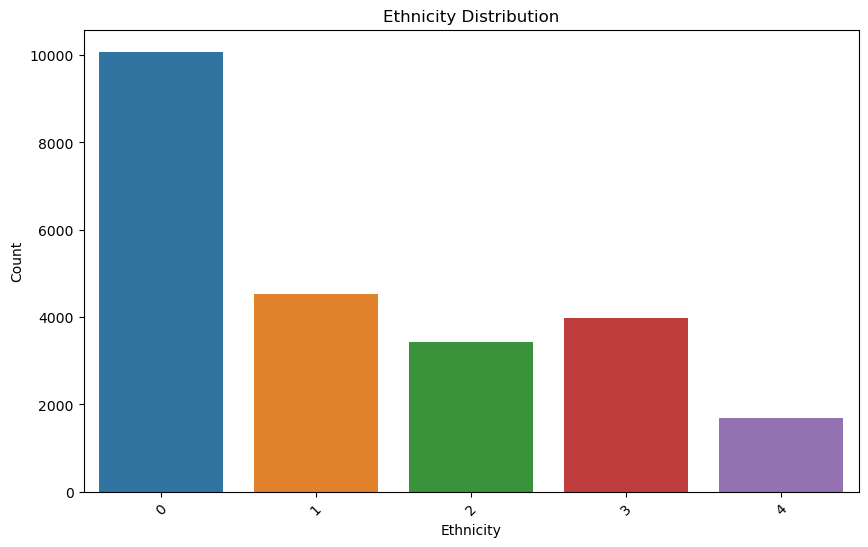

In [26]:
# Visualize the distribution of ethnicities
plt.figure(figsize=(10, 6))
sns.countplot(data=face_df, x='ethnicity')
plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

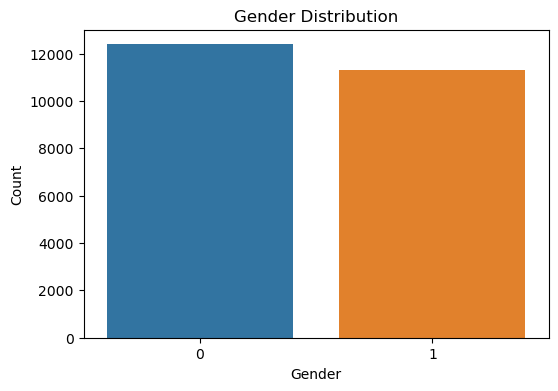

In [27]:
# Visualize the distribution of gender
plt.figure(figsize=(6, 4))
sns.countplot(data=face_df, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

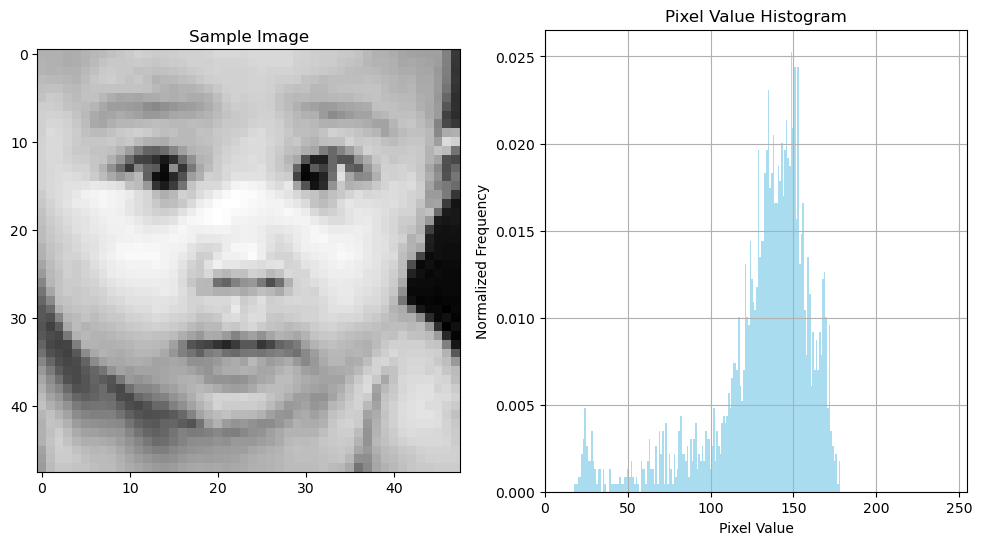

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'features' contains the image data
image = features[0]  # You can choose any image from the dataset

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Sample Image')

plt.subplot(1, 2, 2)
plt.hist(image.ravel(), bins=256, range=(0, 255), density=True, color='skyblue', alpha=0.7)
plt.title('Pixel Value Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')
plt.xlim(0, 255)
plt.grid()

plt.show()


# CNN modeling target 1 - gender

In [32]:
from sklearn.model_selection import train_test_split 

target_gender = face_df['gender']

X_train, X_test, y_train, y_test = train_test_split(
    features,target_gender, test_size=0.2, random_state=2307
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18964, 48, 48, 1), (4741, 48, 48, 1), (18964,), (4741,))

In [33]:
model_gender = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=[48,48, 1]),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    
    keras.layers.Flatten(), 
    keras.layers.Dense(300, activation="relu"), 
    keras.layers.Dense(200, activation="relu"), 
    keras.layers.Dense(2, activation="softmax")]) # output classes 2

model_gender.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 300)              

In [34]:
model_gender.compile(optimizer = 'adam', 
                     loss = 'sparse_categorical_crossentropy', 
                     metrics = ['accuracy'])

In [35]:
# training model_gender

history_gender = model_gender.fit(X_train, y_train, epochs = 10)

Epoch 1/10
593/593 [==============================] - 66s 109ms/step - loss: 1.1299 - accuracy: 0.7631
Epoch 2/10
593/593 [==============================] - 62s 104ms/step - loss: 0.3802 - accuracy: 0.8260
Epoch 3/10
593/593 [==============================] - 60s 101ms/step - loss: 0.3268 - accuracy: 0.8523
Epoch 4/10
593/593 [==============================] - 59s 100ms/step - loss: 0.2885 - accuracy: 0.8708
Epoch 5/10
593/593 [==============================] - 60s 101ms/step - loss: 0.2501 - accuracy: 0.8919
Epoch 6/10
593/593 [==============================] - 58s 98ms/step - loss: 0.2158 - accuracy: 0.9062
Epoch 7/10
593/593 [==============================] - 63s 107ms/step - loss: 0.1911 - accuracy: 0.9209
Epoch 8/10
593/593 [==============================] - 90s 152ms/step - loss: 0.1625 - accuracy: 0.9321
Epoch 9/10
593/593 [==============================] - 84s 141ms/step - loss: 0.1352 - accuracy: 0.9446
Epoch 10/10
593/593 [==============================] - 82s 139ms/step - lo

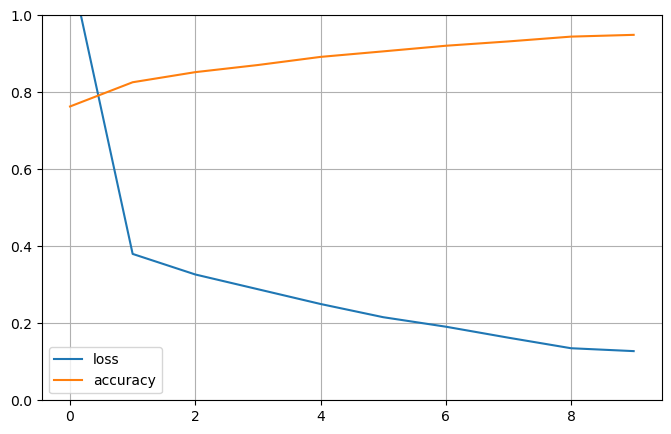

In [36]:
pd.DataFrame(history_gender.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [37]:
# prediction accuracy

model_gender.evaluate(X_test, y_test)

149/149 [==============================] - 3s 16ms/step - loss: 0.4933 - accuracy: 0.8631


[0.4932975471019745, 0.8631090521812439]

# CNN modeling target 2 - ethnicity

In [38]:
target_ethnicity = face_df['ethnicity']

X_train, X_test, y_train, y_test = train_test_split(
    features, target_ethnicity, test_size=0.2, random_state=2307)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18964, 48, 48, 1), (4741, 48, 48, 1), (18964,), (4741,))

In [39]:
model_ethnicity = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=[48,48, 1]),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    
    keras.layers.Flatten(), 
    keras.layers.Dense(300, activation="relu"), 
    keras.layers.Dense(200, activation="relu"), 
    keras.layers.Dense(5, activation="softmax")]) # 5

model_ethnicity.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 9216)              0         
                                                                 
 dense_7 (Dense)             (None, 300)              

In [40]:
model_ethnicity.compile(optimizer = 'adam', 
                        loss = 'sparse_categorical_crossentropy', 
                        metrics = ['accuracy'])

In [41]:
# training model_ethnicity

history_ethnicity = model_ethnicity.fit(X_train, y_train, epochs = 10)

Epoch 1/10
593/593 [==============================] - 73s 122ms/step - loss: 2.6040 - accuracy: 0.5119
Epoch 2/10
593/593 [==============================] - 72s 121ms/step - loss: 0.9606 - accuracy: 0.6531
Epoch 3/10
593/593 [==============================] - 72s 121ms/step - loss: 0.8439 - accuracy: 0.6990
Epoch 4/10
593/593 [==============================] - 74s 124ms/step - loss: 0.7373 - accuracy: 0.7363
Epoch 5/10
593/593 [==============================] - 72s 122ms/step - loss: 0.6635 - accuracy: 0.7622
Epoch 6/10
593/593 [==============================] - 78s 132ms/step - loss: 0.5758 - accuracy: 0.7960
Epoch 7/10
593/593 [==============================] - 73s 124ms/step - loss: 0.5030 - accuracy: 0.8227
Epoch 8/10
593/593 [==============================] - 74s 124ms/step - loss: 0.4298 - accuracy: 0.8479
Epoch 9/10
593/593 [==============================] - 74s 125ms/step - loss: 0.3616 - accuracy: 0.8732
Epoch 10/10
593/593 [==============================] - 73s 123ms/step - l

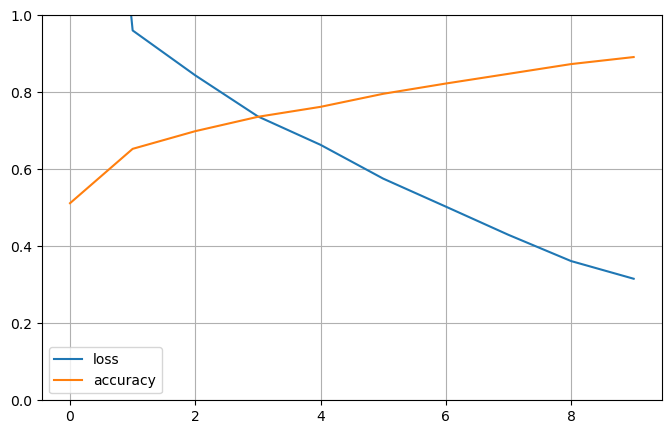

In [42]:
pd.DataFrame(history_ethnicity.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [43]:
# prediction accuracy

model_ethnicity.evaluate(X_test, y_test)


149/149 [==============================] - 3s 16ms/step - loss: 1.1123 - accuracy: 0.6914


[1.11232328414917, 0.6914153099060059]

# CNN modeling target 3 - age

In [44]:
from sklearn.model_selection import train_test_split 

target_age = face_df['age']

X_train, X_test, y_train, y_test = train_test_split(
    features, target_age, test_size=0.2, random_state=2307)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18964, 48, 48, 1), (4741, 48, 48, 1), (18964,), (4741,))

In [45]:
model_age = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=[48,48, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    
    keras.layers.Flatten(), 
    keras.layers.Dense(300, activation="relu"), 
    keras.layers.Dense(200, activation="relu"), 
    keras.layers.Dense(1, activation="relu")]) # 

model_age.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                      

In [46]:
model_age.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse']) # mse

In [47]:
# training model_ethnicity

history_age = model_age.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 10)

#  loss: 32.8751 - mse: 32.8751 - val_loss: 87.3411 - val_mse: 87.3411

Epoch 1/10
593/593 [==============================] - 84s 140ms/step - loss: 166.3742 - mse: 166.3742 - val_loss: 190.8740 - val_mse: 190.8740
Epoch 2/10
593/593 [==============================] - 84s 141ms/step - loss: 98.3960 - mse: 98.3960 - val_loss: 145.9537 - val_mse: 145.9537
Epoch 3/10
593/593 [==============================] - 90s 152ms/step - loss: 83.4780 - mse: 83.4780 - val_loss: 99.3360 - val_mse: 99.3360
Epoch 4/10
593/593 [==============================] - 78s 132ms/step - loss: 72.1654 - mse: 72.1654 - val_loss: 90.8367 - val_mse: 90.8367
Epoch 5/10
593/593 [==============================] - 80s 134ms/step - loss: 61.5659 - mse: 61.5659 - val_loss: 85.2044 - val_mse: 85.2044
Epoch 6/10
593/593 [==============================] - 91s 153ms/step - loss: 54.4836 - mse: 54.4836 - val_loss: 79.7341 - val_mse: 79.7341
Epoch 7/10
593/593 [==============================] - 86s 144ms/step - loss: 47.4601 - mse: 47.4601 - val_loss: 84.0756 - val_mse: 84.0756
Epoch 8/10
593/593 [=

In [48]:
# prediction accuracy

model_age.evaluate(X_test, y_test)

149/149 [==============================] - 3s 20ms/step - loss: 85.2439 - mse: 85.2439


[85.24386596679688, 85.24386596679688]

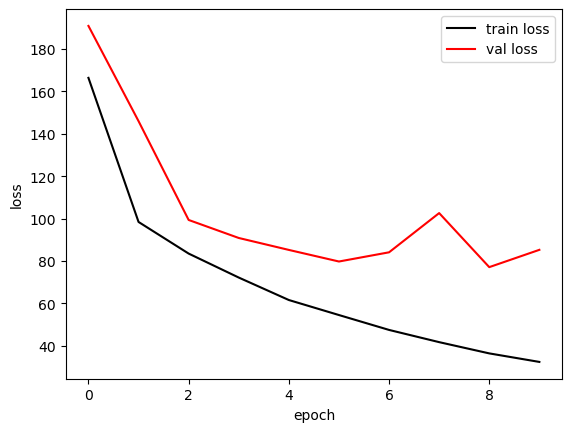

In [49]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(history_age.history['loss'], 'black', label='train loss')   
loss_ax.plot(history_age.history['val_loss'], 'red', label='val loss') 

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend()

plt.show()

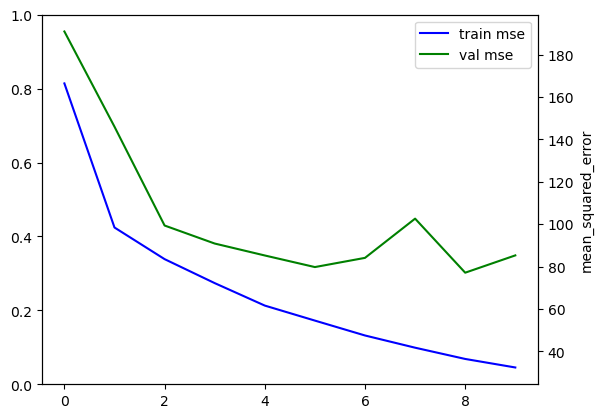

In [50]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

acc_ax.plot(history_age.history['mse'], 'blue', label='train mse')   
acc_ax.plot(history_age.history['val_mse'], 'green', label='val mse') 

acc_ax.set_ylabel('mean_squared_error')

acc_ax.legend()

plt.show()

In [51]:
y_pred = model_age.predict(X_test)
y_pred

149/149 [==============================] - 3s 20ms/step


array([[37.53562  ],
       [20.53931  ],
       [ 9.625076 ],
       ...,
       [ 4.5977874],
       [28.274815 ],
       [23.269663 ]], dtype=float32)

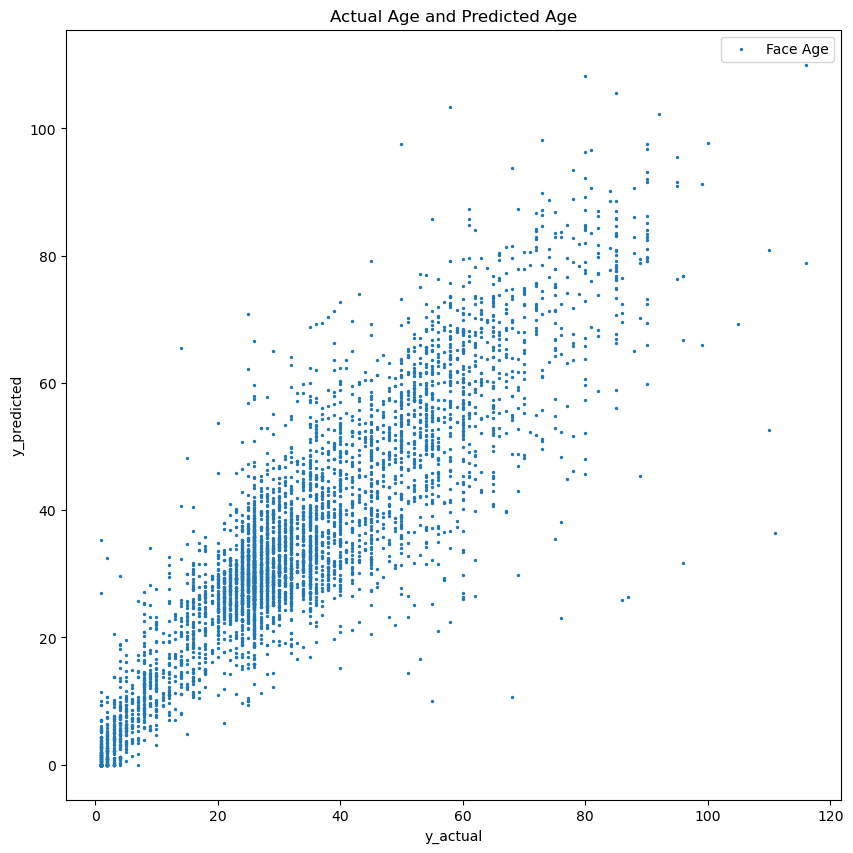

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))  

plt.scatter(y_test, y_pred, label="Face Age", s=2)  
plt.title('Actual Age and Predicted Age')

plt.xlabel('y_actual')   
plt.ylabel('y_predicted')

plt.legend()
plt.show()

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("C:\\Users\\Narthana\\Downloads\\age_gender.csv")

# EDA (Exploratory Data Analysis)

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Data Preprocessing

# Extracting features from the 'pixels' column
data['pixels'] = data['pixels'].apply(lambda x: np.fromstring(x, sep=' '))

# Splitting the dataset into features (X) and labels (y)
X = np.vstack(data['pixels']).reshape(-1, 48, 48, 1)
y_gender = data['gender']
y_age = data['age']

# Data normalization (assuming pixel values range from 0 to 255)
X = X / 255.0

# One-hot encoding for gender
y_gender = pd.get_dummies(y_gender, prefix='gender', drop_first=True)

# Data splitting into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_gender_train, y_gender_test, y_age_train, y_age_test = train_test_split(
    X, y_gender, y_age, test_size=0.2, random_state=42)

# Now you can use X_train, X_test, y_gender_train, y_gender_test, y_age_train, y_age_test in your machine learning models.


   age  ethnicity  gender                        img_name  \
0    1          2       0  20161219203650636.jpg.chip.jpg   
1    1          2       0  20161219222752047.jpg.chip.jpg   
2    1          2       0  20161219222832191.jpg.chip.jpg   
3    1          2       0  20161220144911423.jpg.chip.jpg   
4    1          2       0  20161220144914327.jpg.chip.jpg   

                                              pixels  
0  129 128 128 126 127 130 133 135 139 142 145 14...  
1  164 74 111 168 169 171 175 182 184 188 193 199...  
2  67 70 71 70 69 67 70 79 90 103 116 132 145 155...  
3  193 197 198 200 199 200 202 203 204 205 208 21...  
4  202 205 209 210 209 209 210 211 212 214 218 21...  
age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64
                age     ethnicity        gender
count  23705.000000  23705.000000  23705.000000
mean      33.300907      1.269226      0.477283
std       19.885708      1.345638      0.499494
min        1.000000    

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import categorical_accuracy
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


# Encode the gender labels (0 for Male, 1 for Female)
label_encoder = LabelEncoder()
y_gender_train_encoded = label_encoder.fit_transform(y_gender_train)
y_gender_test_encoded = label_encoder.transform(y_gender_test)

# Convert the encoded labels to one-hot format
y_gender_train_one_hot = to_categorical(y_gender_train_encoded, num_classes=2)
y_gender_test_one_hot = to_categorical(y_gender_test_encoded, num_classes=2)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 classes for gender prediction (Male, Female)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=categorical_crossentropy,
              metrics=[categorical_accuracy])

# Train the model
batch_size = 32
epochs = 10

history = model.fit(
    X_train,  # Training data (images)
    y_gender_train_one_hot,  # Gender labels (one-hot encoded)
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1  # You can adjust the validation split as needed
)

# Make predictions
y_gender_pred = model.predict(X_test)

# Convert predictions to class labels (0 for Male, 1 for Female)
y_gender_pred_labels = [1 if pred[0] < 0.5 else 0 for pred in y_gender_pred]



Epoch 1/10
534/534 [==============================] - 40s 73ms/step - loss: 0.4506 - categorical_accuracy: 0.7801 - val_loss: 0.3256 - val_categorical_accuracy: 0.8540
Epoch 2/10
534/534 [==============================] - 38s 71ms/step - loss: 0.3303 - categorical_accuracy: 0.8525 - val_loss: 0.3097 - val_categorical_accuracy: 0.8624
Epoch 3/10
534/534 [==============================] - 35s 65ms/step - loss: 0.2979 - categorical_accuracy: 0.8695 - val_loss: 0.2780 - val_categorical_accuracy: 0.8730
Epoch 4/10
534/534 [==============================] - 35s 66ms/step - loss: 0.2770 - categorical_accuracy: 0.8788 - val_loss: 0.2643 - val_categorical_accuracy: 0.8840
Epoch 5/10
534/534 [==============================] - 36s 66ms/step - loss: 0.2589 - categorical_accuracy: 0.8889 - val_loss: 0.2844 - val_categorical_accuracy: 0.8777
Epoch 6/10
534/534 [==============================] - 36s 67ms/step - loss: 0.2483 - categorical_accuracy: 0.8927 - val_loss: 0.2605 - val_categorical_accuracy:

In [60]:
from sklearn.metrics import accuracy_score

# Assuming you have the ground truth labels in y_gender_test_encoded and predictions in y_gender_pred_labels

# Calculate accuracy
accuracy = accuracy_score(y_gender_test_encoded, y_gender_pred_labels)

print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 88.34%


In [61]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Assuming you have the ground truth labels in y_gender_test_encoded and predictions in y_gender_pred_labels

# Confusion Matrix
conf_matrix = confusion_matrix(y_gender_test_encoded, y_gender_pred_labels)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_gender_test_encoded, y_gender_pred_labels)
print("Classification Report:\n", class_report)

# ROC AUC Score
roc_auc = roc_auc_score(y_gender_test_encoded, y_gender_pred_labels)
print("ROC AUC Score:", roc_auc)


Confusion Matrix:
 [[2293  175]
 [ 378 1895]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89      2468
           1       0.92      0.83      0.87      2273

    accuracy                           0.88      4741
   macro avg       0.89      0.88      0.88      4741
weighted avg       0.89      0.88      0.88      4741

ROC AUC Score: 0.8813961692506138


In [70]:
import cv2  # OpenCV for image processing

# Load a sample image (replace 'sample_image.jpg' with the path to your image)
sample_image_path = "C:\\Users\\Narthana\\Downloads\\o-GOOGLE-FACIAL-RECOGNITION-facebook.jpg"
sample_image = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale

# Resize the image to match the input shape expected by the model (48x48 pixels)
sample_image = cv2.resize(sample_image, (48, 48))
sample_image = sample_image.reshape(1, 48, 48, 1)  # Reshape to (1, 48, 48, 1) for a single image

# Predict the gender using the trained model
predicted_gender = model.predict(sample_image)

# Convert the predicted output to a human-readable gender label
predicted_gender_label = "Female" if predicted_gender[0][0] > 0.5 else "Male"

# Print the predicted gender
print(f"Predicted Gender: {predicted_gender_label}")


1/1 [==============================] - 0s 22ms/step
Predicted Gender: Male
